In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv",header=None)
df

0   1       2           3   4         5     6        7        8   \
0    328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0   
1    228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000   
2    134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000   
3    256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000   
4    228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000   
..   ...  ..     ...         ...  ..       ...   ...      ...      ...   
995    3  38  941851  16-07-1991  OH  500/1000  1000  1310.80        0   
996  285  41  186934  05-01-2014  IL   100/300  1000  1436.79        0   
997  130  34  918516  17-02-2003  OH   250/500   500  1383.49  3000000   
998  458  62  533940  18-11-2011  IL  500/1000  2000  1356.92  5000000   
999  456  60  556080  11-11-1996  OH   250/500  1000   766.19        0   

         9   ... 29   30      31     32     33     34          35       36  \
0    466132  ...  2  YES   71610   6510  13020  52080        Saab      92x   
1    468176  ...  0    ?    5070    780    780   3510    Mercedes     E400   
2    430632  ...  3   NO   34650   7700   3850  23100       Dodge      RAM   
3    608117  ...  2   NO   63400   6340   6340  50720   Chevrolet    Tahoe   
4    610706  ...  1   NO    6500   1300    650   4550      Accura      RSX   
..      ...  ... ..  ...     ...    ...    ...    ...         ...      ...   
995  431289  ...  1    ?   87200  17440   8720  61040       Honda   Accord   
996  608177  ...  3    ?  108480  18080  18080  72320  Volkswagen   Passat   
997  442797  ...  3  YES   67500   7500   7500  52500      Suburu  Impreza   
998  441714  ...  1  YES   46980   5220   5220  36540        Audi       A5   
999  612260  ...  3    ?    5060    460    920   3680    Mercedes     E400   

       37 38  
0    2004  Y  
1    2007  Y  
2    2007  N  
3    2014  Y  
4    2009  N  
..    ... ..  
995  2006  N  
996  2015  N  
997  1996  N  
998  1998  N  
999  2007  N  

[1000 rows x 39 columns]

This dataset does not have column headings. So, let's assign column headings to this dataset.

In [102]:
df.columns=["months_as_customer","age","policy_number","policy_bind_date","policy_state","policy_csl","policy_deductable",
            "policy_annual_premium","umbrella_limit","insured_zip","insured_sex","insured_education_level","insured_occupation",
            "insured_hobbies","insured_relationship","capital_gains","capital_loss","incident_date","incident_type",
            "collision_type","incident_severity","authorities_contacted","incident_state","incident_city","incident_location",
            "incident_hour_of_the_day","number_of_vehicles_involved","property_damage","bodily_injuries","witnesses",
            "police_report_available","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_make",
            "auto_model","auto_year","fraud_reported"]

In [103]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

Observations:

The dataset contains 1000 rows and 39 columns.

The column "fraud_reported" is the label which is categorical, so this is a classification problem.

In [104]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [105]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[5 rows x 39 columns]

# Exploratory Data Analysis (EDA)

In [106]:
df.shape

(1000, 39)

In [107]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gains                    int64
capital_loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observations:

There are 21 object data type, 17 integer data type and 1 float data type columns.

The "policy_bind_date" and "incident_date" columns are of object data type but they should be of datetime data type.

In [109]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

Observations:

Some columns have continuous data and some have categorical data.

The data type of the columns "policy_bind_date" and "incident_date" need to be converted into datatime type and they have to be split into day, month and year columns.

The "policy_csl" column has to be split by "/" into two columns of integer data type.

Sone columns contain "?" values which need to be handled appropriately.

The label "fraud_reported" has two categories. Hence, this is a binary classification problem.

The columns "policy_number", "insured_zip" and "incident_location" are irrelevant and do not contribute to the prediction of the label. So they have to be removed.

In [110]:
#Drop the irrelevant columns
df.drop(["policy_number","insured_zip","incident_location"],axis=1,inplace=True)

In [111]:
#Check null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

As we can see, there are no null values in any of the columns in the dataset.

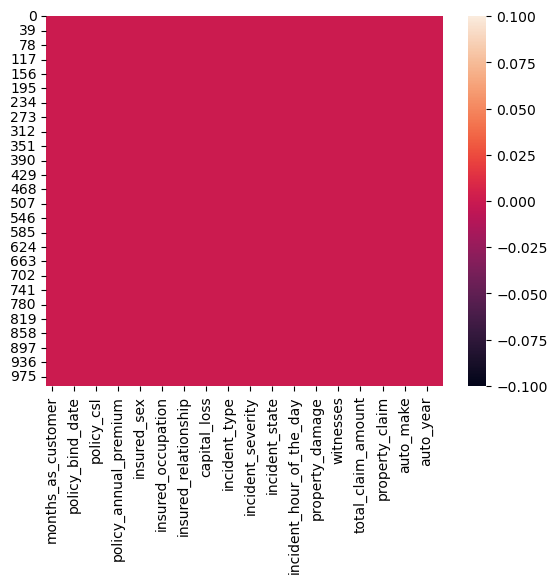

In [112]:
#Visualize null values
sns.heatmap(df.isnull())
plt.show()

We can also visualize that there are no null values in the dataset.

In [113]:
#Check if any whitespace, "NA", "-" or "?" exist in the dataset
df.isin([' ','NA','-','?']).sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount  

From the above list and from the value counts list, we come to know that some "?" values exist in the columns "collision_type", "property_damage" and "police_report_available" columns. We will replace these values with NaN values.

In [114]:
#Replace "?" values with NaN values
df['collision_type'].replace('?',np.nan,inplace=True)
df['property_damage'].replace('?',np.nan,inplace=True)
df['police_report_available'].replace('?',np.nan,inplace=True)

In [115]:
#Check if any whitespace, "NA", "-" or "?" exist in the dataset again
df.isin([' ','NA','-','?']).sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

Now, we can see that no whitespace, "NA", "-" or "?" exist in the dataset.

Handling the missing values

In [116]:
#Check null values again
df.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount  

Now, we can see that some null values exist in the columns "collision_type", "property_damage" and "police_report_available".

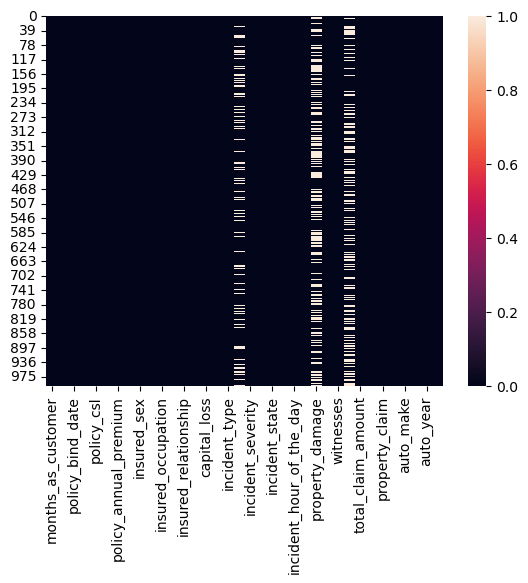

In [117]:
#Visualize null values again
sns.heatmap(df.isnull())
plt.show()

We can also visualize that some null values exist in the columns "collision_type", "property_damage" and "police_report_available". We will fill these null values with the mode values of the respective columns as all these columns are categorical.

In [118]:
#Fill the null values
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [119]:
#Check null values again
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

Now, we can see that there are no null values in the dataset.

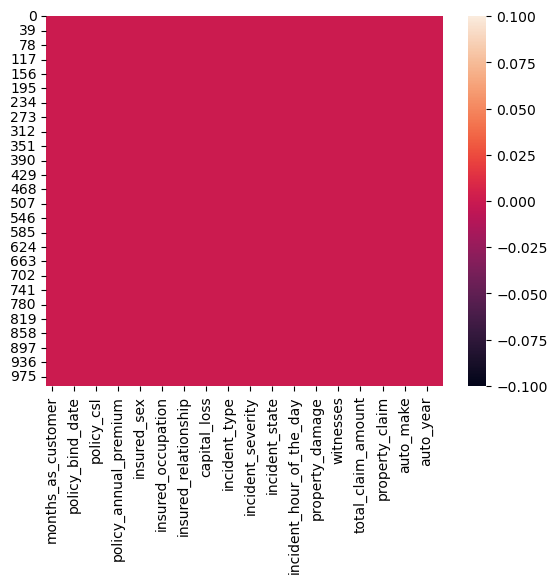

In [120]:
#Visualize null values again
sns.heatmap(df.isnull())
plt.show()

We can also visualize that there are no null values in the dataset.

In [121]:
# Converting date columns from object data type to datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

# Extracting day, month and year columns from policy_bind_date
df['policy_bind_day']=df['policy_bind_date'].dt.day
df['policy_bind_month']=df['policy_bind_date'].dt.month
df['policy_bind_year']=df['policy_bind_date'].dt.year

# Extracting day, month and year columns from incident_date
df['incident_day']=df['incident_date'].dt.day
df['incident_month']=df['incident_date'].dt.month
df['incident_year']=df['incident_date'].dt.year

In [122]:
#Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

Since the "policy_csl" column contains a "/", it resulted in an object data type column. This column represents the Combined Single Limit (CSL) in the insurance policy, which combines both bodily injury and property damage liability coverage into a single limit. To better capture this information, we will perform a split operation on the column, creating two new columns named "csl_accidental" and "csl_overall". Subsequently, we will remove the original "policy_csl" column from our dataset.

In [123]:
#Split the "policy_csl" column into two columns
df['csl_accidental']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_overall']=df.policy_csl.str.split('/',expand=True)[1]
df['csl_accidental']=df['csl_accidental'].astype('int64')
df['csl_overall']=df['csl_overall'].astype('int64')

#Drop the "policy_csl" column
df.drop("policy_csl",axis=1,inplace=True)

In [126]:
#Check if there are any duplicate values/rows in the dataset
df.duplicated().sum()

0

We can observe that there are no duplicate values/rows in our dataset. 

In [127]:
df.shape

(1000, 41)

Now, there are 1000 rows and 41 columns in the dataset.

In [128]:
#Check the counts of unique values of each column again
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


 0           798
 6000000      57
 5000000      46
 4000000      3

We can see that the column "incident_year" contains the same value "2015" throughout. So it does not contribute to the prediction of the label and it can be removed.

In [129]:
df.drop("incident_year",axis=1,inplace=True)

In [130]:
df.shape

(1000, 40)

Now, we have 1000 rows and 40 columns in the dataset.

In [131]:
#Check the counts of unique values of each column again
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


 0           798
 6000000      57
 5000000      46
 4000000      3

In [132]:
#Separate continuous and categorical columns
continuous_col=[]
categorical_col=[]
for col in df.columns:
    if df[col].dtypes=='Object' or df[col].nunique()<40:
        categorical_col.append(col)
    else:
        continuous_col.append(col)
print("Continuous columns: ",continuous_col)
print("No. of continuous columns is ",len(continuous_col))
print("\n")
print("Categorical columns: ",categorical_col)
print("No. of categorical columns is ",len(categorical_col))

Continuous columns:  ['months_as_customer', 'age', 'policy_annual_premium', 'capital_gains', 'capital_loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
No. of continuous columns is  9


Categorical columns:  ['policy_state', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'csl_accidental', 'csl_overall']
No. of categorical columns is  31


In [133]:
#Statistical summary of numerical columns
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital_gains   capital_loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

       ...  property_claim  vehicle_claim    auto_year  policy_bind_day  \
count  ...     1000.000000    1000.000000  1000.000000      1000.000000   
mean   ...     7399.570000   37928.950000  2005.103000        15.448000   
std    ...     4824.726179   18886.252893     6.015861         8.850176   
min    ...        0.000000      70.000000  1995.000000         1.000000   
25%    ...     4445.000000   30292.500000  2000.000000         8.000000   
50%    ...     6750.000000   42100.000000  2005.000000        16.000000   
75%    ...    10885.000000   50822.500000  2010.000000        23.000000   
max    ...    23670.000000   79560.000000  2015.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       csl_accidental  csl_overall  
count     1000.000000  1000.000000  
mean       272.650000   580.200000  
std        161.603196   287.420547  
min        100.000000   300.000000  
25%        100.000000   300.000000  
50%        250.000000   500.000000  
75%        500.000000  1000.000000  
max        500.000000  1000.000000  

[8 rows x 23 columns]

Observations:

There are no missing values in the dataset.

Some of the continuous columns appear to have skewness and outliers.

# Data Visualization

# Univariate Analysis

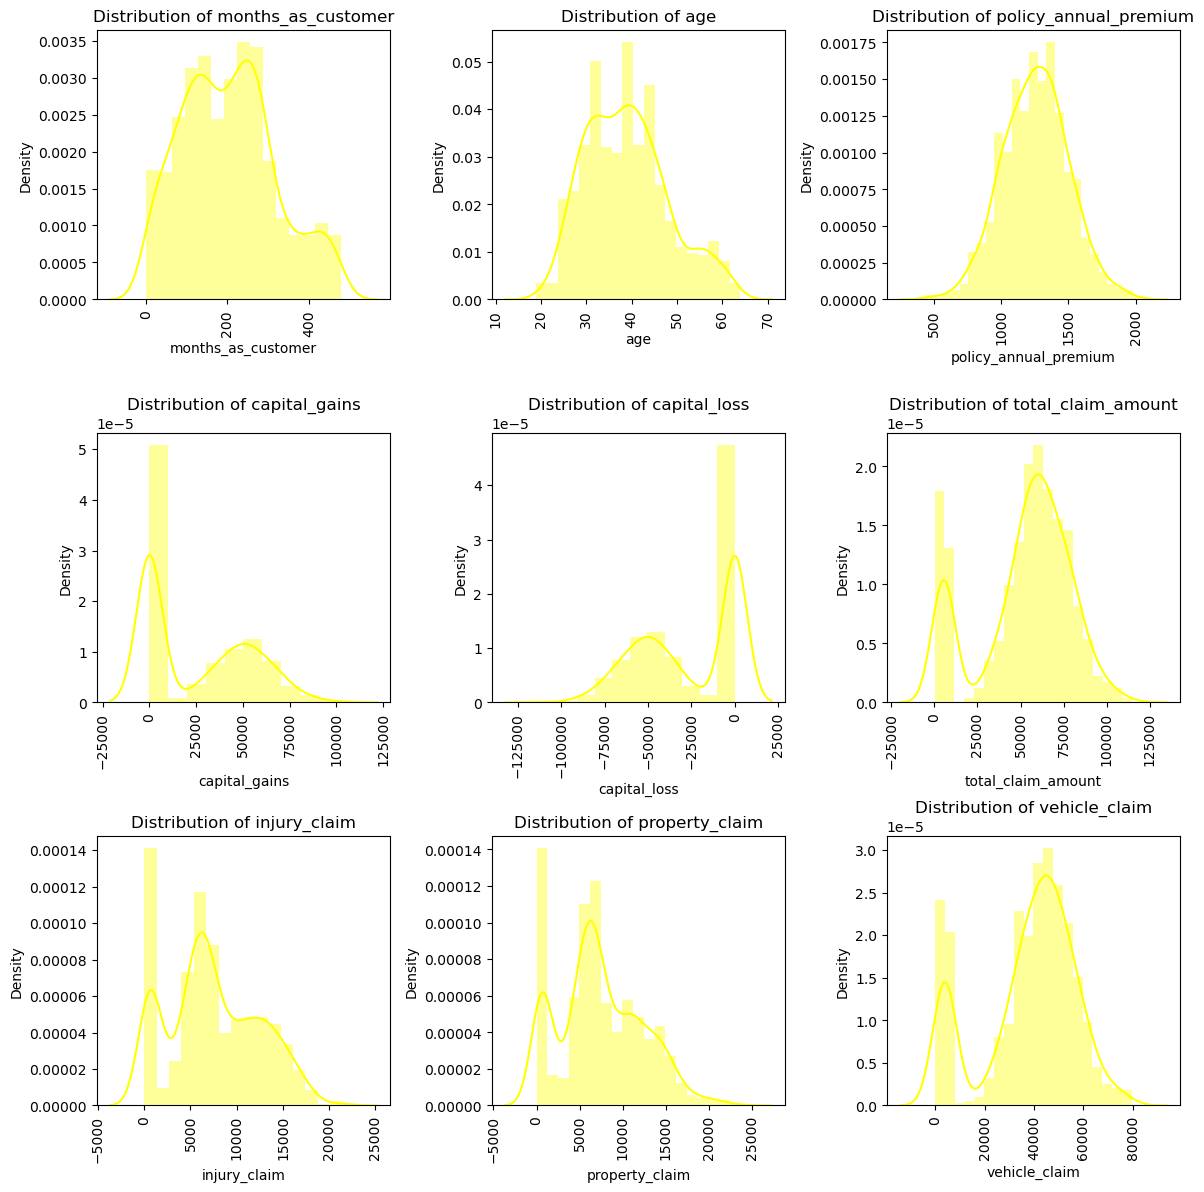

In [134]:
#Analyse the distribution of data for all the continuous data columns
plt.figure(figsize=(12,12),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(df[col],color="yellow")
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")
    plotnumber+=1
plt.tight_layout()

Observations:

The column "capital_gains" appears to be right skewed.

The column "capital_loss" appears to be left skewed.

Other columns do not have much of skewness.

In [135]:
#Analyse the distribution of data for all the categorical data columns
plt.figure(figsize=(14,434),facecolor="white")
plotnumber=1
for col in categorical_col:
    plt.subplot(62,1,plotnumber)
    ax=sns.countplot(x=col,data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.title(f"{col} Count")
    plt.subplot(62,1,plotnumber+1)
    df[col].value_counts().plot(kind='pie', autopct='%0.1f%%',label='')
    plt.gca().yaxis.set_visible(False)
    plt.title(f"{col} Percentage")
    plotnumber+=2
plt.tight_layout()

Observations:

352 or 35.2% of the people have the policy state as Ohio (OH) which is the most frequent policy state.

Largest number of people have policy deductable as 1000 with 351 or 35.1% of the people having this amount.

Largest number of people have the umbrella limit as 0 with 798 or 79.8% of people having this amount.

Female insurance claimants are slightly higher than males with 537 or 53.7% of the people being females.

Largest number of insurance claimants have the education level as JD with 161 or 16.1% of the claimants having this education level.

Largest number of insurance claimants work as machine-op-inspct with 93 or 9.3% of the people falling in this category.

Largest number of insurance claimants have the hobby of reading with 64 or 6.4% of the people having this hobby.

Largest number of insurance claimants' relationship fall in the category of own-child with 183 or 18.3% of the people falling in this category.

Most number of incidents are multi-vehicle collisions with 419 or 41.9% of incidents falling in this category.

Most number of collision types are rear collisions with 470 or 47% of the collisions being of this type.

The severity of the most number of incidents are minor damage with 354 or 35.4% of incidents causing only minor damage.

Most of the insurance claimants have contacted police after the incidents with 292 or 29.2% of the people falling in this category.

Most number of accidents have happend in the state of New York with 262 or 26.2% fo accidents happening in this state.

Most number of accidents have happend in the city of Springfield with 157 or 15.7% fo accidents happening in this city.

Most number of accidents have happened in the 17th hour of the day with 54 or 5.4% of accidents happening in this hour.

Only one vehicle is involved in the most number of accidents with 581 or 58.1% of the accidents falling in this category.

No property damage has been reported in the most number of accidents with 698 or 69.8% of accidents not involving any property damage.

No bodily injury has been reported in the most number of accidents with 340 or 34% of accidents falling in this category.

There has been only one witness in the most number of accidents with 258 or 25.8% of accidents falling in this category.

No police report available for the most number of accidents with 686 or 68.6% of accidents having no police report.

The make of the most number of vehicles involved in the accidents are either Saab or Dodge or Suburu.

The model of the most number of vehicle involved in the accidents is RAM with 43 or 4.3% of vehicles in this model.

The year of the most number of vehicles is 1995 with 56 or 5.6% of the vehicles falling in this category.

No fraud has been reported in the most number of insurance claims with 753 or 75.3% of claims found to be genuine.

28th day of the month has been the policy bind day for most of the policies with 48 or 4.8% of policies falling in this category.

July has been the policy bind month for most of the policies with 96 or 9.6% of policies falling in this category.

1991 has been the policy bind year for most of the policies with 55 or 5.5% of the policies having this year.

Most of the accidents have happened on the first day of the month with 200 or 20% of the accidents happening on this day.

Most of the accidents have happened in the month of January with 365 or 36.5% of accidents happening in this month.

Most of the policies have the accidental coverage of CSL as 250 with 351 or 35.1% of policies falling in this category.

Most of the policies have the overall coverage of CSL as 500 with 351 or 35.1% of policies falling in this category.

# Bivariate Analysis

Analyse the relationship between the label and the features

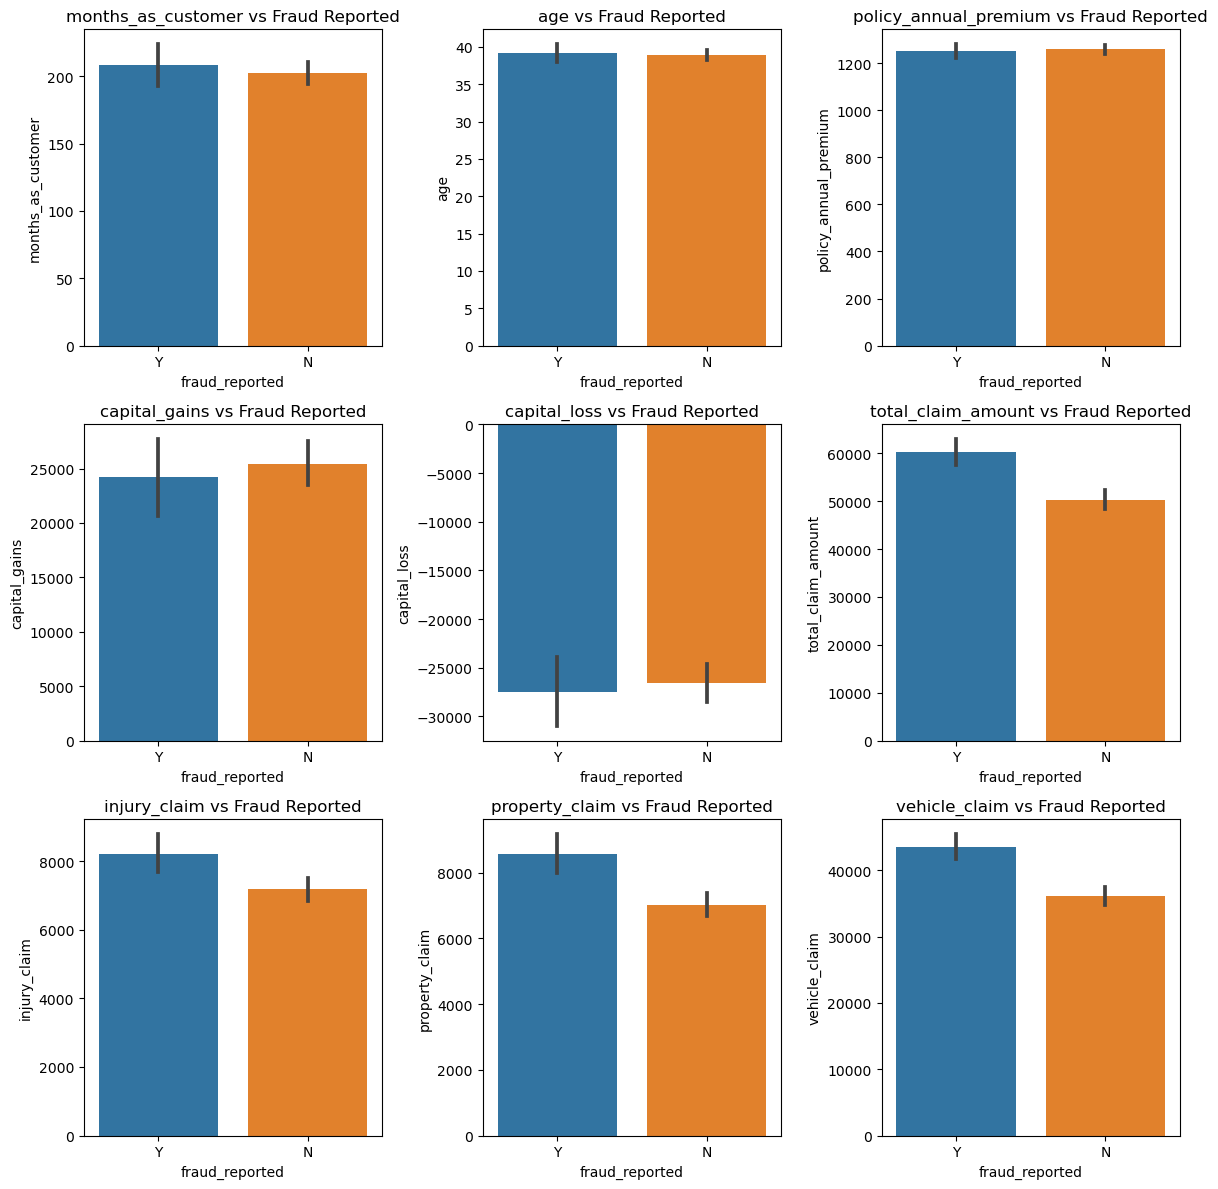

In [136]:
#Analyse the correlation between "fraud_reported" and various continuous features
plt.figure(figsize=(12,12),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(3,3,plotnumber)
    sns.barplot(x='fraud_reported',y=col,data=df)
    plt.title(f"{col} vs Fraud Reported")
    plotnumber+=1
plt.tight_layout()

Observations:

The features "months_as_customer", "age" and "policy_annual_premium" are unchanged with change in "fraud_reported". So these features have no correlation with the label "fraud_reported".

"capital_gains" and "capital_loss" change very little with change in "fraud_reported". So these features have very low correlation with the label "fraud_reported".

Fraud is reported for higher total claim amounts and no fraud is reported for lower total claim amounts. So "total_claim_amount" has significant correlation with "fraud_reported".

Fraud is reported for higher injury claim amounts and no fraud is reported for lower injury claim amounts. So "injury_claim" has significant correlation with "fraud_reported".

Fraud is reported for higher property claim amounts and no fraud is reported for property claim amounts. So "property_claim" has significant correlation with "fraud_reported".

Fraud is reported for higher vehicle claim amounts and no fraud is reported for lower vehicle claim amounts. So "vehicle_claim" has significant correlation with "fraud_reported".

In [137]:
#Analyse "fraud_reported" based on different categorical features
cat_col=categorical_col.copy()
cat_col.remove("fraud_reported")
plt.figure(figsize=(14,420),facecolor="white")
plotnumber=1
for col in cat_col:
    #Calculate counts and percentages
    label_counts=df.groupby([col,'fraud_reported'])[col].count()
    total_counts=df.groupby(col)['fraud_reported'].count()
    label_percentages=(label_counts/total_counts*100).round(2)
    label_df=pd.concat([label_counts,label_percentages], axis=1, keys=['Count','Percentage']).reset_index()
    
    #First plot
    plt.subplot(60,1,plotnumber)
    ax=sns.barplot(x=col,y='Count',hue='fraud_reported',data=label_df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.title(f"Count of Fraud Reported vs {col}")
    
    #Second plot
    plt.subplot(60,1,plotnumber+1)
    ax=sns.barplot(x=col,y='Percentage',hue='fraud_reported',data=label_df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.title(f"Percentage of Fraud Reported vs {col}")
    plotnumber+=2
plt.tight_layout()

Observations:

Ohio (OH) has reported the highest percentage of frauds in insurance claims at 25.85% and Illinois has reported the highest percentage of genuine insurance claims at 77.22%.

The percentage of frauds reported for different policy deductable amounts is almost similar.

The percentage of fraudulent insurance claims reported for an umbrella limit of 2000000 is the highest at 66.67% and for an umbrella limit of -1000000 the percentage of genuine claims is highest at 100%.

The percentage of frauds reported for male insurance claimants is slightly higher than females at 26.13%.

The percentage of fraudulent claims reported from claimants with all education levels is almost the same.

Claimants having occupation of exec-managerial have reported the highest percentage of fraudulent insurance claims at 36.84% and those having the occupation of other-service or priv-house-serv have reported the highest percentage of genuine insurance claims.

The claimants who have the hobby of Chess have reported the highest percentage of fraudulent claims at 82.61% and those having the hobby of Camping have reported the highest percentage of genuine claims at 90.91%.

Those having the relationship of other-relative have reported the highest percentage of fraudulent claims at 29.38% and those having the relationship of husband have reported the highest percentage of genuine claims at 79.41%.

Accidents involving single vehicle collision have reported the highest percentage of fraudulent claims at 29.03% and those involving vehicle theft have reported the highest percentage of genuine claims at 91.49%.

Accidents involving front collision have reported the highest percentage of fraudulent claims at 27.56% and accidents involving rear collision have reported the highest percentage of genuine claims at 77.23%.

Accidents with a severity of major damage have reported the highest percentage of fraudulent claims at 60.51% and accidents with a severity of trivial damage have reported the highest percentage of genuine claims at 93.33%.

Accidents where other authorities have been contacted have reported the highest percentage of fraudulent claims at 31.82% and accidents where noone has been contacted have reported the highest percentage of genuine claims at 93.41%.

Accidents that happened in Ohio (OH) have reported the highest percentage of fraudulent claims at 43.48% and accidents that happened in West Virginia (WV) have reported the highest percentage of genuine claims at 82.03%.

The percentage of frauds reported from all the cities is almost the same.

Accidents that happened in the 11th hour of the day have reported the highest percentage of fraudulent claims at 40% and accidents that happened in the 9th hour of the day have reported the highest percentage of genuine claims at 90.7%.

Accidents where 4 vehicles were involved have reported the highest percentage of fraudulent claims at 35.48% and accidents where 1 vehicle was involved have reported the highest percentage of genuine claims at 77.11%.

Accidents where there was property damage have reported a slightly higher percentage of fraudulent claims at 25.83% than those where there was no property damage.

Accidents which involved 2 bodily injuries have reported a slightly higher percentage of fraudulent claims at 27.11%.

Accidents where there were 2 witnesses have reported the highest percentage of fraudulent claims at 29.6% and accidents where there were no witnesses have reported the highest percentage of genuine claims at 79.92%.

Accidents where there was no police report available have reported a slightly higher percentage of fraudulent claims at 25.51% than those where there was police report available.

Accidents where the auto make was Mercedes have reported the highest percentage of fraudulent claims at 33.85% and accidens where the auto make was Jeep have reported the highest percentage of genuine claims at 83.58%.

Accidents where the auto model was X6 have reported the highest percentage of fraudulent claims at 43.75% and accidents where the auto model was 3 Series have reported the highest percentage of genuine claims at 94.44%.

Accidents where the auto year was 2004 have reported the highest percentage of fraudulent claims at 41.03% and accidents where the auto year was 2010 have reported the highest percentage of genuine claims at 86%.

Claims where the policy bind day was 27 have reported the highest percentage of frauds at 43.33% and claims where the policy bind day was 14 have reported the highest percentage of genuine claims at 87.1%.

Claims where the policy bind month was July have reported the highest percentage of frauds at 30.21% and claims where the policy bind month was August have reported the highest percentage of genuine claims at 82.93%.

Claims where the policy bind year was 2012 have reported the highest percentage of frauds at 38.89% and claims where the policy bind year was 2015 have reported the highest percentage of genuine claims at 100%.

Accidents that happened in the 14th day of the month have reported the highest percentage of fraudulent claims at 37.84% and accidents that happened in the 18th day of the month have reported the highest percentage of genuine claims at 90.91%.

Accidents that happened in August have reported the highest percentage of fraudulent claims at 41.03% and accidents that happened in November have reported the highest percentage of genuine claims at 84.21%.

Policies that have the accidental coverage of CSL as 250 have reported the highest percentage of fraudulent claims at 26.21% and policies that have the accidental coverage of CSL as 500 have reported the highest percentage of genuine claims at 78.33%.

Policies that have the overall coverage of CSL as 500 have reported the highest percentage of fraudulent claims at 26.21% and policies that have the overall coverage of CSL as 1000 have reported the highest percentage of genuine claims at 78.33%.

Analyse the relationship between different features

In [138]:
#Analyse the relationship between incident type and collision type
cross_table=pd.crosstab(df['incident_type'],df['collision_type'])
percentage_table=(cross_table.div(cross_table.sum(axis=1),axis=0)*100).round(2)
percentage_table

collision_type            Front Collision  Rear Collision  Side Collision
incident_type                                                            
Multi-vehicle Collision             27.45           36.28           36.28
Parked Car                           0.00          100.00            0.00
Single Vehicle Collision            34.49           34.74           30.77
Vehicle Theft                        0.00          100.00            0.00

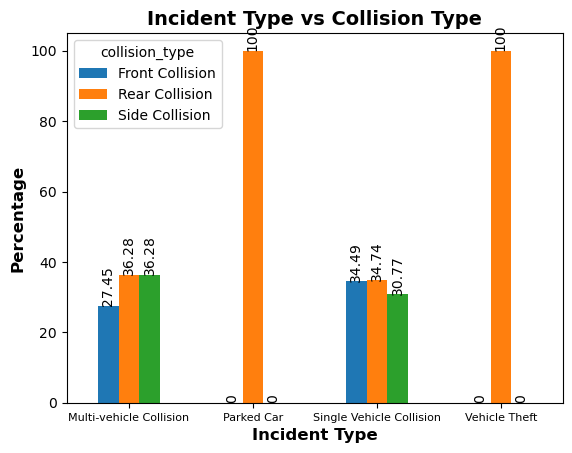

In [139]:
#Visualize the relationship between incident type and collision type
ax=percentage_table.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container,rotation=90)
plt.xlabel("Incident Type",fontsize=12,fontweight='bold')
plt.ylabel("Percentage",fontsize=12,fontweight='bold')
plt.xticks(fontsize=8,rotation=0)
plt.title("Incident Type vs Collision Type",fontsize=14,fontweight='bold')
plt.show()

Observations:

Multi-vehicle collision: 27.45% of multi-vehicle collisions are classified as front collisions, 36.28% as rear collisions and 36.28% as side collisions. Multi-vehicle collisions show a relatively even distribution among front, rear and side collision types.

Parked car: 100% of incidents involving parked cars are classified as rear collisions.

Single vehicle collision: 34.49% of single vehicle collisions are classified as front collisions, 34.74% as rear collisions and 30.77% as side collisions. Single vehicle collisions show a relatively balanced distribution among front, rear, and side collision types.

Vehicle theft: 100% of incidents involving vehicle theft are classified as rear collisions.

# Multivariate Analysis

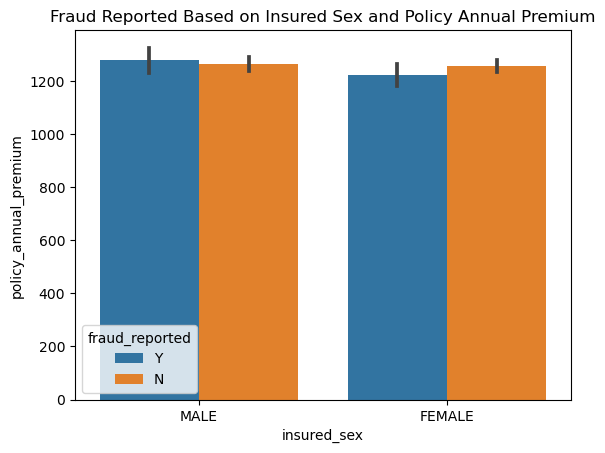

In [140]:
#Analyse fraud reported based on insured sex and policy annual premium
sns.barplot(x='insured_sex',y='policy_annual_premium',hue='fraud_reported',data=df)
plt.title("Fraud Reported Based on Insured Sex and Policy Annual Premium")
plt.show()

We can observe that there is no gender based imbalance between the amount of policy annual premium and frauds reported.

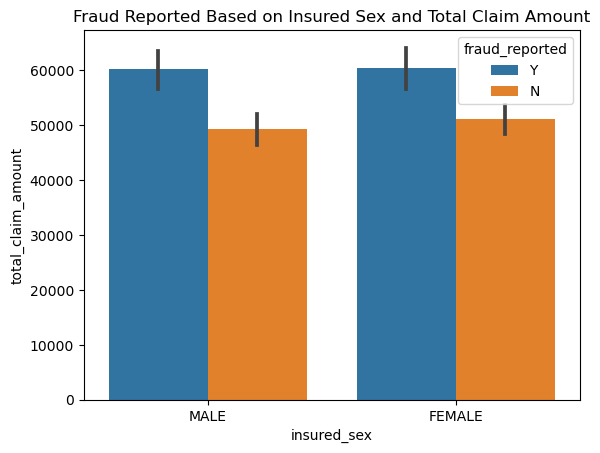

In [141]:
#Analyse fraud reported based on insured sex and total claim amount
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.title("Fraud Reported Based on Insured Sex and Total Claim Amount")
plt.show()

We can observe that the number of fraudulent claims reported is higher when the total claim amount is higher and in this case also there is no gender based imbalance between fraud reported and total claim amount.

Checking for Outliers

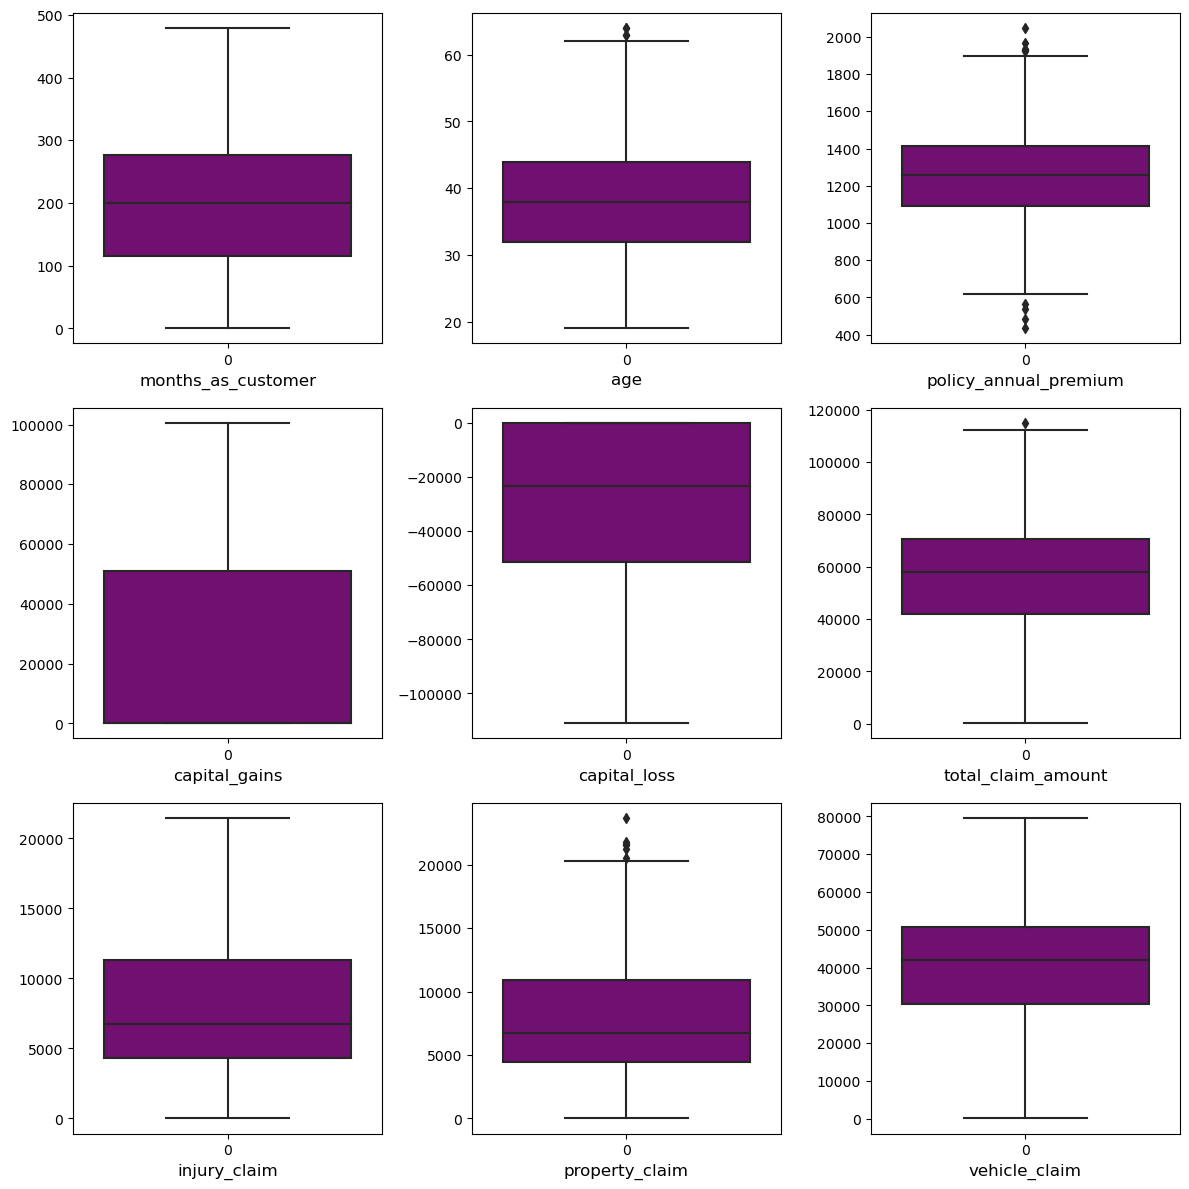

In [142]:
#Check for outliers in continuous data columns
plt.figure(figsize=(12,12),facecolor="white")
plotnumber=1
for col in continuous_col:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(df[col],color="purple")
    plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see that there are outliers in the features "age", "policy_annual_premium", "total_claim_amount" and "property_claim". We will remove these outliers by using IQR method.

In [143]:
#Separate the features with outliers
out_features=df[["age","policy_annual_premium","total_claim_amount","property_claim"]]

#Calculate IQR
Q1=out_features.quantile(0.25)
Q3=out_features.quantile(0.75)
IQR=Q3-Q1

#Calcualte lower and upper bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove outliers
df1=df[((out_features>=lower_bound) & (out_features<=upper_bound)).all(axis=1)]

In [144]:
df1.shape

(980, 40)

In [145]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  2.0


The data loss percentage 2% which is less than 10% and hence acceptable. So, we will copy the changed dataset df1 into the original dataset df.

In [146]:
df=df1.copy()

In [147]:
df.shape

(980, 40)

Encoding Categorical Columns

In [148]:
#Separate columns to encode
cat_col=[]
for col in df.columns:
    if df[col].dtypes=='object':
        cat_col.append(col)
cat_col

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [150]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for col in cat_col:
    df[col]=OE.fit_transform(df[col].values.reshape(-1,1))
df

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48           2.0               1000   
1                   228   42           1.0               2000   
2                   134   29           2.0               2000   
3                   256   41           0.0               2000   
4                   228   44           0.0               1000   
..                  ...  ...           ...                ...   
995                   3   38           2.0               1000   
996                 285   41           0.0               1000   
997                 130   34           2.0                500   
998                 458   62           0.0               2000   
999                 456   60           2.0               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0          1.0   
1                  1197.22         5000000          1.0   
2                  1413.14         5000000          0.0   
3                  1415.74         6000000          0.0   
4                  1583.91         6000000          1.0   
..                     ...             ...          ...   
995                1310.80               0          0.0   
996                1436.79               0          0.0   
997                1383.49         3000000          0.0   
998                1356.92         5000000          1.0   
999                 766.19               0          0.0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4.0                 2.0             17.0  ...   
1                        4.0                 6.0             15.0  ...   
2                        6.0                11.0              2.0  ...   
3                        6.0                 1.0              2.0  ...   
4                        0.0                11.0              2.0  ...   
..                       ...                 ...              ...  ...   
995                      5.0                 2.0             13.0  ...   
996                      6.0                 9.0             17.0  ...   
997                      5.0                 1.0              3.0  ...   
998                      0.0                 5.0              0.0  ...   
999                      0.0                11.0             11.0  ...   

     auto_model  auto_year  fraud_reported  policy_bind_day  \
0           1.0       2004             1.0               17   
1          12.0       2007             1.0               27   
2          30.0       2007             0.0                9   
3          34.0       2014             1.0               25   
4          31.0       2009             0.0                6   
..          ...        ...             ...              ...   
995         6.0       2006             0.0               16   
996        28.0       2015             0.0                1   
997        19.0       1996             0.0               17   
998         5.0       1998             0.0               18   
999        12.0       2007             0.0               11   

     policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                   10              2014            25               1   
1                    6              2006            21               1   
2                    6              2000            22               2   
3                    5              1990             1              10   
4                    6              2014            17               2   
..                 ...               ...           ...             ...   
995                  7              1991            22               2   
996                  5              2014            24               1   
997                  2              2003            23               1   
998                 11              2011            26               2   
999                 11              1996            26 

Checking for Skewness

In [152]:
df.skew()

months_as_customer             0.338883
age                            0.436437
policy_state                  -0.036226
policy_deductable              0.467802
policy_annual_premium         -0.001956
umbrella_limit                 1.808528
insured_sex                    0.147563
insured_education_level        0.003617
insured_occupation            -0.063267
insured_hobbies               -0.040032
insured_relationship           0.077422
capital_gains                  0.478946
capital_loss                  -0.389995
incident_type                  0.105918
collision_type                -0.032778
incident_severity              0.272993
authorities_contacted         -0.124697
incident_state                -0.139782
incident_city                  0.044619
incident_hour_of_the_day      -0.033970
number_of_vehicles_involved    0.497315
property_damage                0.863621
bodily_injuries                0.015073
witnesses                      0.026530
police_report_available        0.791134


We can see that the continuous features "total_claim_amount" and "vehicle_claim" have skewness. We will use different transformation methods to reduce skewness in these columns.

In [153]:
#Copy df into a new dataset for checking different transformation methods
skew_df=df.copy()

Apply cube root transformation method

In [154]:
skew_df["total_claim_amount"]=np.cbrt(skew_df["total_claim_amount"])
skew_df["vehicle_claim"]=np.cbrt(skew_df["vehicle_claim"])

In [155]:
skew_df.skew()

months_as_customer             0.338883
age                            0.436437
policy_state                  -0.036226
policy_deductable              0.467802
policy_annual_premium         -0.001956
umbrella_limit                 1.808528
insured_sex                    0.147563
insured_education_level        0.003617
insured_occupation            -0.063267
insured_hobbies               -0.040032
insured_relationship           0.077422
capital_gains                  0.478946
capital_loss                  -0.389995
incident_type                  0.105918
collision_type                -0.032778
incident_severity              0.272993
authorities_contacted         -0.124697
incident_state                -0.139782
incident_city                  0.044619
incident_hour_of_the_day      -0.033970
number_of_vehicles_involved    0.497315
property_damage                0.863621
bodily_injuries                0.015073
witnesses                      0.026530
police_report_available        0.791134


We can see that the features "total_claim_amount" and "vehicle_claim" still have skewness. So, we will try Yeo-Johnson transformation method.

In [156]:
#Copy df again into skew_df
skew_df=df.copy()

In [157]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
skew_df[["total_claim_amount","vehicle_claim"]]=pt.fit_transform(skew_df[["total_claim_amount","vehicle_claim"]])

In [158]:
skew_df.skew()

months_as_customer             0.338883
age                            0.436437
policy_state                  -0.036226
policy_deductable              0.467802
policy_annual_premium         -0.001956
umbrella_limit                 1.808528
insured_sex                    0.147563
insured_education_level        0.003617
insured_occupation            -0.063267
insured_hobbies               -0.040032
insured_relationship           0.077422
capital_gains                  0.478946
capital_loss                  -0.389995
incident_type                  0.105918
collision_type                -0.032778
incident_severity              0.272993
authorities_contacted         -0.124697
incident_state                -0.139782
incident_city                  0.044619
incident_hour_of_the_day      -0.033970
number_of_vehicles_involved    0.497315
property_damage                0.863621
bodily_injuries                0.015073
witnesses                      0.026530
police_report_available        0.791134


So, we have reduced the skewness in the features "total_claim_amount" and "vehicle_claim" as much as we can.

In [159]:
#Copy the changed dataset skew_df into the original dataset df
df=skew_df.copy()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           980 non-null    int64  
 1   age                          980 non-null    int64  
 2   policy_state                 980 non-null    float64
 3   policy_deductable            980 non-null    int64  
 4   policy_annual_premium        980 non-null    float64
 5   umbrella_limit               980 non-null    int64  
 6   insured_sex                  980 non-null    float64
 7   insured_education_level      980 non-null    float64
 8   insured_occupation           980 non-null    float64
 9   insured_hobbies              980 non-null    float64
 10  insured_relationship         980 non-null    float64
 11  capital_gains                980 non-null    int64  
 12  capital_loss                 980 non-null    int64  
 13  incident_type       

In [161]:
#Statistical summary of numerical columns
df.describe()

months_as_customer         age  policy_state  policy_deductable  \
count          980.000000  980.000000    980.000000         980.000000   
mean           203.921429   38.887755      1.019388        1140.306122   
std            113.515173    9.008885      0.830122         611.815821   
min              0.000000   19.000000      0.000000         500.000000   
25%            118.750000   32.000000      0.000000         500.000000   
50%            200.500000   38.000000      1.000000        1000.000000   
75%            276.000000   44.000000      2.000000        2000.000000   
max            479.000000   62.000000      2.000000        2000.000000   

       policy_annual_premium  umbrella_limit  insured_sex  \
count             980.000000    9.800000e+02   980.000000   
mean             1257.813969    1.103061e+06     0.463265   
std               235.324509    2.302592e+06     0.498903   
min               617.110000   -1.000000e+06     0.000000   
25%              1092.735000    0.000000e+00     0.000000   
50%              1259.670000    0.000000e+00     0.000000   
75%              1415.695000    0.000000e+00     1.000000   
max              1896.910000    1.000000e+07     1.000000   

       insured_education_level  insured_occupation  insured_hobbies  ...  \
count               980.000000          980.000000       980.000000  ...   
mean                  2.967347            6.666327         9.633673  ...   
std                   1.948509            4.007639         5.658614  ...   
min                   0.000000            0.000000         0.000000  ...   
25%                   1.000000            3.000000         5.000000  ...   
50%                   3.000000            7.000000        10.000000  ...   
75%                   5.000000           10.000000        14.000000  ...   
max                   6.000000           13.000000        19.000000  ...   

       auto_model    auto_year  fraud_reported  policy_bind_day  \
count  980.000000   980.000000      980.000000       980.000000   
mean    19.332653  2005.134694        0.245918        15.436735   
std     11.138810     6.009035        0.430850         8.846730   
min      0.000000  1995.000000        0.000000         1.000000   
25%     10.000000  2000.000000        0.000000         8.000000   
50%     20.000000  2005.000000        0.000000        16.000000   
75%     29.000000  2010.000000        0.000000        23.000000   
max     38.000000  2015.000000        1.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count         980.000000        980.000000    980.000000      980.000000   
mean            6.568367       2001.620408     13.105102        3.407143   
std             3.397773          7.363937     10.452880        3.275025   
min             1.000000       1990.000000      1.000000        1.000000   
25%             4.000000       1995.000000      2.000000        1.000000   
50%             7.000000       2002.000000     15.000000        2.000000   
75%             9.000000       2008.000000     22.000000        5.000000   
max            12.000000       2015.000000     31.000000       12.000000   

       csl_accidental  csl_overall  
count      980.000000   980.000000  
mean       272.193878   579.591837  
std        161.879863   287.804263  
min        100.000000   300.000000  
25%        100.000000   300.000000  
50%        250.000000   500.000000  
75%        500.000000  1000.000000  
max        500.000000  1000.000000  

[8 rows x 40 columns]

Observations:

Now, we can see that there is not much skewness in the continuous features as the mean is almost equal to the median (50%) in these columns.

There are no outliers in the continuous features as the max is not much bigger than 75% in these columns.

In [162]:
#Check the correlation between features and label
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922633     -0.006065   
age                                    0.922633  1.000000     -0.015143   
policy_state                          -0.006065 -0.015143      1.000000   
policy_deductable                      0.031596  0.037330      0.009722   
policy_annual_premium                  0.000493  0.011339      0.023352   
umbrella_limit                         0.011880  0.013656     -0.024560   
insured_sex                            0.057133  0.073851     -0.014310   
insured_education_level               -0.006098  0.001828     -0.038761   
insured_occupation                     0.013048  0.028074     -0.032748   
insured_hobbies                       -0.092358 -0.085545     -0.037411   
insured_relationship                   0.074424  0.077509     -0.016677   
capital_gains                          0.003663 -0.006213      0.067554   
capital_loss                           0.017558  0.001018     -0.028580   
incident_type                         -0.017817 -0.027808      0.031450   
collision_type                        -0.069861 -0.076126      0.060178   
incident_severity                     -0.050652 -0.050538     -0.021699   
authorities_contacted                  0.021204  0.026549     -0.012169   
incident_state                         0.003955  0.000598      0.014619   
incident_city                         -0.002607 -0.005761     -0.000310   
incident_hour_of_the_day               0.075812  0.090169      0.026771   
number_of_vehicles_involved            0.014352  0.024297     -0.045831   
property_damage                        0.001827 -0.006362     -0.010015   
bodily_injuries                       -0.009567 -0.017551      0.004736   
witnesses                              0.047773  0.041519      0.027540   
police_report_available               -0.017554 -0.015402      0.063444   
total_claim_amount                     0.067491  0.073897     -0.012390   
injury_claim                           0.064142  0.075395     -0.050031   
property_claim                         0.057393  0.078206      0.006970   
vehicle_claim                          0.062672  0.063233     -0.005590   
auto_make                              0.051099  0.033421      0.019884   
auto_model                             0.001197  0.016700     -0.026879   
auto_year                             -0.003161  0.000487      0.002957   
fraud_reported                         0.018315  0.008961      0.029495   
policy_bind_day                        0.045804  0.047241     -0.002267   
policy_bind_month                      0.001334  0.013298      0.072502   
policy_bind_year                      -0.052113 -0.039505     -0.005479   
incident_day                          -0.007327 -0.004799      0.017893   
incident_month                         0.018965  0.021734      0.023018   
csl_accidental                        -0.010252 -0.005119     -0.002825   
csl_overall                           -0.008475 -0.004233     -0.006893   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031596               0.000493   
age                                   0.037330               0.011339   
policy_state                          0.009722               0.023352   
policy_deductable                     1.000000               0.001071   
policy_annual_premium                 0.001071               1.000000   
umbrella_limit                        0.006039              -0.003024   
insured_sex                          -0.015725               0.042906   
insured_education_level               0.023554              -0.028562   
insured_occupation                   -0.046708               0.028498   
insured_hobbies                       0.007780              -0.018811   
insured_relationship                 -0.024699               0.009083   
capital_gains                         0.038836              -0.004345   
capi

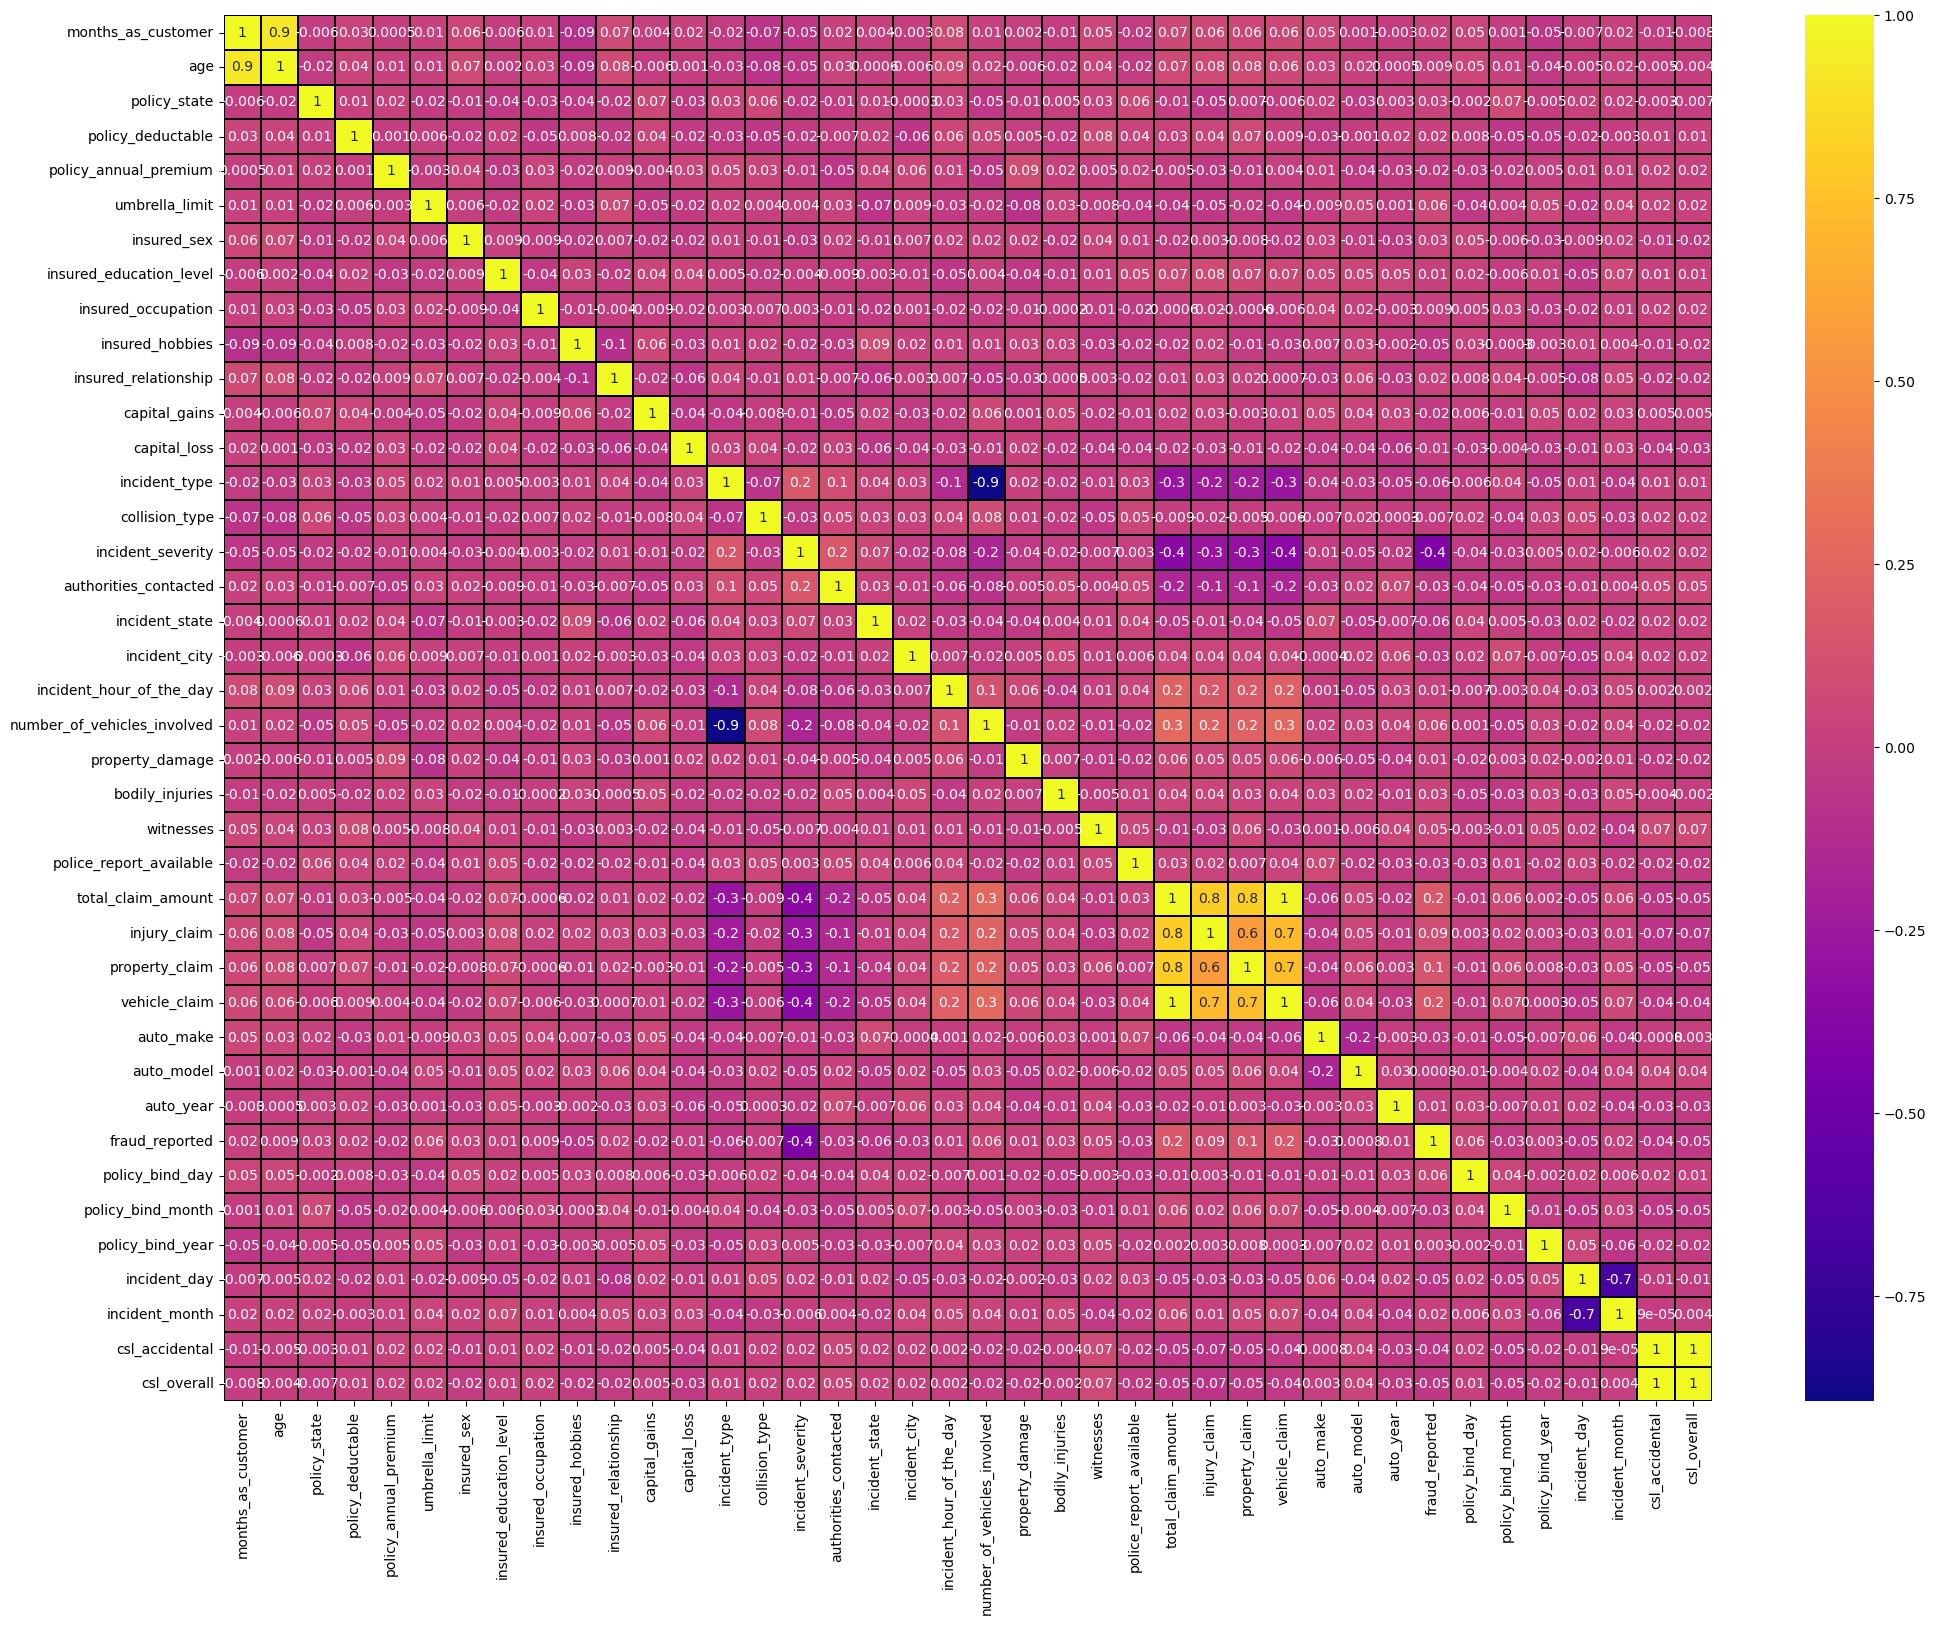

In [169]:
#Visualize the correlation between features and label
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='plasma')
plt.show()

Observations:

The label "fraud_reported" does not have significant correlation with any of the features.

The features "age" and "months_as_customer", "total_claim_amount" and "injury_claim", "total_claim_amount" and "property_claim", "injury_claim" and "vehicle_claim", "property_claim" and "vehicle_claim", "injury_claim" and "property_claim" have a high positive correlation between each other.

The features "number_of_vehicles_involved" and "incident_type", "incident_month" and "incident_day" have high negative correlation between each other.

The features "vehicle_claim" and "total_claim_amount", "csl_overall" and "csl_accidental" have perfect positive correlation between each other.

In [170]:
#Check the correlation of features with the label
cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.169737
total_claim_amount             0.163791
property_claim                 0.141582
injury_claim                   0.093275
umbrella_limit                 0.061944
policy_bind_day                0.061300
number_of_vehicles_involved    0.057773
witnesses                      0.051577
bodily_injuries                0.031717
insured_sex                    0.030190
policy_state                   0.029495
insured_relationship           0.024104
policy_deductable              0.022034
months_as_customer             0.018315
incident_month                 0.016562
incident_hour_of_the_day       0.014612
property_damage                0.011396
auto_year                      0.011260
insured_education_level        0.009575
age                            0.008961
insured_occupation             0.008528
policy_bind_year               0.003375
auto_model                     0.000815
collision_type                -0.007050


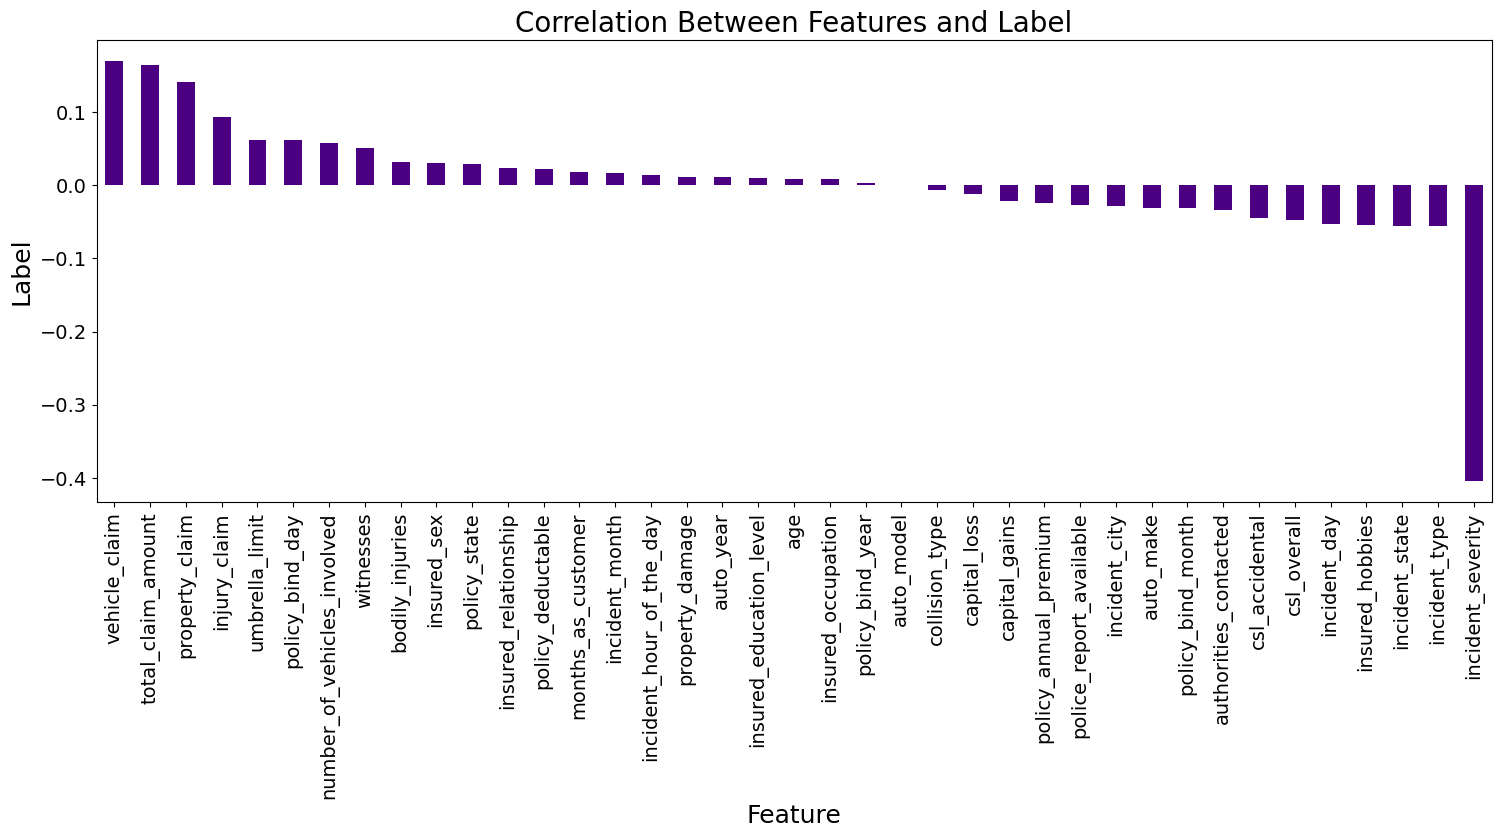

In [171]:
#Visualize the corrlation of features with the label
plt.figure(figsize=(18,6))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Label',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Between Features and Label',fontsize=20)
plt.show()

We can observe that the features "insured_education_level", "age", "insured_occupation", "policy_bind_year", "auto_model" and "collision_type" have very low correlation with the label "fraud_reported". So, we will remove these features from the dataset.

In [172]:
#Drop the unwanted features
df.drop(["insured_education_level","age","insured_occupation","policy_bind_year","auto_model","collision_type"],axis=1,inplace=True)

In [173]:
df.shape

(980, 34)

Now, we have 980 rows and 34 columns in the dataset.

Separating features and label

In [174]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

Feature Scaling

In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer  policy_state  policy_deductable  \
0              1.093615      1.181890          -0.229444   
1              0.212226     -0.023367           1.405869   
2             -0.616280      1.181890           1.405869   
3              0.459015     -1.228624           1.405869   
4              0.212226     -1.228624          -0.229444   
..                  ...           ...                ...   
975           -1.770900      1.181890          -0.229444   
976            0.714618     -1.228624          -0.229444   
977           -0.651536      1.181890          -1.047101   
978            2.239421     -1.228624           1.405869   
979            2.221794      1.181890          -0.229444   

     policy_annual_premium  umbrella_limit  insured_sex  insured_hobbies  \
0                 0.633900       -0.479297     1.076378         1.302455   
1                -0.257623        1.693278     1.076378         0.948831   
2                 0.660387        1.693278    -0.929041        -1.349725   
3                 0.671442        2.127793    -0.929041        -1.349725   
4                 1.386437        2.127793     1.076378        -1.349725   
..                     ...             ...          ...              ...   
975               0.225277       -0.479297    -0.929041         0.595207   
976               0.760938       -0.479297    -0.929041         1.302455   
977               0.534327        0.824248    -0.929041        -1.172913   
978               0.421361        1.693278     1.076378        -1.703349   
979              -2.090199       -0.479297    -0.929041         0.241583   

     insured_relationship  capital_gains  capital_loss  ...  property_claim  \
0               -1.431433       1.006272      0.955922  ...        1.212584   
1               -0.245630      -0.900843      0.955922  ...       -1.390665   
2                0.347271       0.355062      0.955922  ...       -0.737726   
3                0.940172       0.848837     -1.272327  ...       -0.208144   
4                0.940172       1.460688     -0.686697  ...       -1.418314   
..                    ...            ...           ...  ...             ...   
975              0.940172      -0.900843      0.955922  ...        0.298044   
976              1.533073       1.636014      0.955922  ...        2.288763   
977             -0.245630       0.355062      0.955922  ...        0.038570   
978              1.533073      -0.900843      0.955922  ...       -0.446349   
979             -1.431433      -0.900843      0.955922  ...       -1.360889   

     vehicle_claim  auto_make  auto_year  policy_bind_day  policy_bind_month  \
0         0.764038   0.850932  -0.188928         0.176796           1.010481   
1        -1.785933   0.356322   0.310575         1.307734          -0.167362   
2        -0.820859  -0.632900   0.310575        -0.727955          -0.167362   
3         0.687278  -0.880205   1.476083         1.081546          -0.461823   
4        -1.739710  -1.622121   0.643578        -1.067236          -0.167362   
..             ...        ...        ...              ...                ...   
975       1.274269  -0.138289   0.144074         0.063702           0.127099   
976       1.926596   1.592848   1.642584        -1.632706          -0.461823   
977       0.787782   1.098237  -1.520936         0.176796          -1.345205   
978      -0.100564  -1.374816  -1.187934         0.289889           1.304942   
979      -1.778456   0.356322   0.310575        -0.501767           1.304942   

     incident_day  incident_month  csl_accidental  csl_overall  
0        1.138535       -0.735375       -0.137171    -0.276690  
1        0.755670       -0.735375       -0.137171    -0.276690  
2        0.851386       -0.429878       -1.064257    -0.971961  
3       -1.158655        2.014098       -0.137171    -0.276690  
4        0.372805       -0.429878        1.407973     1.461489  
..            ...             ...             ...          ...  
975   

Now, we have done feature scaling to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [176]:
#Find out Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF Values                     Features
0       1.040327           months_as_customer
1       1.032017                 policy_state
2       1.038235            policy_deductable
3       1.032171        policy_annual_premium
4       1.033271               umbrella_limit
5       1.032381                  insured_sex
6       1.047476              insured_hobbies
7       1.053047         insured_relationship
8       1.033604                capital_gains
9       1.034076                 capital_loss
10      5.156223                incident_type
11      1.237288            incident_severity
12      1.103078        authorities_contacted
13      1.046055               incident_state
14      1.031582                incident_city
15      1.087803     incident_hour_of_the_day
16      5.126683  number_of_vehicles_involved
17      1.031437              property_damage
18      1.025986              bodily_injuries
19      1.042340                    witnesses
20      1.039814      police_report_available
21  22434.860927           total_claim_amount
22    840.129479                 injury_claim
23    788.784222               property_claim
24  11198.861031                vehicle_claim
25      1.040945                    auto_make
26      1.034566                    auto_year
27      1.022756              policy_bind_day
28      1.037138            policy_bind_month
29      1.839784                 incident_day
30      1.847259               incident_month
31     97.469386               csl_accidental
32     97.312217                  csl_overall

We can observe that the features "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "csl_accidental" and "csl_overall" have VIF values greater than 10 which indicates that there is multicollinearity problem with the features. So, we will remove the feature "total_claim_amount" which has the highest VIF value first and then see if the multicollinearity problem still exists.

In [177]:
#Copy x into a new dataframe and drop the column
x1=x.copy()
x1.drop("total_claim_amount",axis=1,inplace=True)

In [178]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

VIF Values                     Features
0     1.038893           months_as_customer
1     1.031941                 policy_state
2     1.036466            policy_deductable
3     1.031684        policy_annual_premium
4     1.033238               umbrella_limit
5     1.029745                  insured_sex
6     1.046489              insured_hobbies
7     1.052745         insured_relationship
8     1.033324                capital_gains
9     1.034074                 capital_loss
10    5.143372                incident_type
11    1.185416            incident_severity
12    1.077117        authorities_contacted
13    1.042038               incident_state
14    1.030663                incident_city
15    1.077402     incident_hour_of_the_day
16    5.106824  number_of_vehicles_involved
17    1.031348              property_damage
18    1.023117              bodily_injuries
19    1.042337                    witnesses
20    1.038525      police_report_available
21    2.149634                 injury_claim
22    2.257596               property_claim
23    3.305425                vehicle_claim
24    1.039373                    auto_make
25    1.034540                    auto_year
26    1.022739              policy_bind_day
27    1.036933            policy_bind_month
28    1.839729                 incident_day
29    1.846110               incident_month
30   97.394937               csl_accidental
31   97.259018                  csl_overall

Now, the features "csl_accidental" and "csl_overall" have VIF values greater than 10. We will remove "csl_accidental" which has the highest VIF value first and see.

In [179]:
#Drop the column
x1.drop("csl_accidental",axis=1,inplace=True)

In [180]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

VIF Values                     Features
0     1.038797           months_as_customer
1     1.030673                 policy_state
2     1.036395            policy_deductable
3     1.029638        policy_annual_premium
4     1.030971               umbrella_limit
5     1.025325                  insured_sex
6     1.045066              insured_hobbies
7     1.047667         insured_relationship
8     1.033257                capital_gains
9     1.033529                 capital_loss
10    5.141785                incident_type
11    1.185380            incident_severity
12    1.075959        authorities_contacted
13    1.041603               incident_state
14    1.030067                incident_city
15    1.077291     incident_hour_of_the_day
16    5.106276  number_of_vehicles_involved
17    1.031345              property_damage
18    1.023029              bodily_injuries
19    1.041470                    witnesses
20    1.033628      police_report_available
21    2.149015                 injury_claim
22    2.257416               property_claim
23    3.305349                vehicle_claim
24    1.036497                    auto_make
25    1.034536                    auto_year
26    1.021673              policy_bind_day
27    1.036920            policy_bind_month
28    1.839656                 incident_day
29    1.844024               incident_month
30    1.022830                  csl_overall

Now, none of the columns have VIF values greater than 10. Hence the problem of multicollinearity has been solved and we can proceed further.

In [181]:
#Copy x1 into the original dataframe x
x=x1.copy()

In [182]:
y.value_counts()

0.0    739
1.0    241
Name: fraud_reported, dtype: int64

We can see from the above values that the data in the label is not balanced. As this is a classification problem, we need to balance the data and we will do this by oversampling the data using SMOTE method.

Balancing the Label

In [183]:
#Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [184]:
y1.value_counts()

1.0    739
0.0    739
Name: fraud_reported, dtype: int64

In [185]:
y1.shape

(1478,)

In [186]:
x1.shape

(1478, 31)

# Model Building

Finding the best random state

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random state",maxRS)

Best accuracy is  0.8806306306306306 at random state 73


Creating train test split

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

Importing the necessary modules

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [190]:
#Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8941441441441441
[[193  24]
 [ 23 204]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       217
         1.0       0.89      0.90      0.90       227

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



In [191]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7342342342342343
[[157  60]
 [ 58 169]]
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       217
         1.0       0.74      0.74      0.74       227

    accuracy                           0.73       444
   macro avg       0.73      0.73      0.73       444
weighted avg       0.73      0.73      0.73       444



In [192]:
#KNeighbors Classifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.6914414414414415
[[ 90 127]
 [ 10 217]]
              precision    recall  f1-score   support

         0.0       0.90      0.41      0.57       217
         1.0       0.63      0.96      0.76       227

    accuracy                           0.69       444
   macro avg       0.77      0.69      0.66       444
weighted avg       0.76      0.69      0.67       444



In [193]:
#Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8671171171171171
[[176  41]
 [ 18 209]]
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       217
         1.0       0.84      0.92      0.88       227

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444



In [194]:
#XGB Classifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.9234234234234234
[[192  25]
 [  9 218]]
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       217
         1.0       0.90      0.96      0.93       227

    accuracy                           0.92       444
   macro avg       0.93      0.92      0.92       444
weighted avg       0.93      0.92      0.92       444



In [195]:
#Random Forest Classfier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8986486486486487
[[192  25]
 [ 20 207]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       217
         1.0       0.89      0.91      0.90       227

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



In [196]:
#Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8986486486486487
[[191  26]
 [ 19 208]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       217
         1.0       0.89      0.92      0.90       227

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



In [197]:
#Gradient Boosting Classifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.9166666666666666
[[195  22]
 [ 15 212]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       217
         1.0       0.91      0.93      0.92       227

    accuracy                           0.92       444
   macro avg       0.92      0.92      0.92       444
weighted avg       0.92      0.92      0.92       444



# Cross Validation

In [198]:
from sklearn.model_selection import cross_val_score

In [199]:
#Cross Validation of Decision Tree Classifier model
score=cross_val_score(DTC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predDTC)-score.mean())

[0.77027027 0.79054054 0.84797297 0.85084746 0.88135593]
0.8281974347228586
Difference between accuracy score and cross validation score is -  0.06594670942128555


In [200]:
#Cross Validation of Logistic Regression model
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.73986486 0.74662162 0.73648649 0.72542373 0.8       ]
0.7496793403573065
Difference between accuracy score and cross validation score is -  -0.01544510612307226


In [201]:
#Cross Validation of KNeighbors Classifier model
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

[0.67905405 0.66216216 0.74324324 0.70508475 0.73220339]
0.704349519010536
Difference between accuracy score and cross validation score is -  -0.012908077569094512


In [202]:
#Cross Validation of Support Vector Machine Classifier model
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

[0.81081081 0.81418919 0.87162162 0.88813559 0.89830508]
0.8566124599175448
Difference between accuracy score and cross validation score is -  0.010504657199572387


In [203]:
#Cross Validation of XGB Classifier model
score=cross_val_score(XGB,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predXGB)-score.mean())

[0.76689189 0.86148649 0.93581081 0.93220339 0.94915254]
0.8891090242785159
Difference between accuracy score and cross validation score is -  0.034314399144907526


In [204]:
#Cross Validation of Random Forest Classifier model
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.76351351 0.84797297 0.91554054 0.93220339 0.93559322]
0.8789647274393039
Difference between accuracy score and cross validation score is -  0.019683921209344812


In [205]:
#Cross Validation of Bagging Classifier model
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

[0.80743243 0.87162162 0.87162162 0.90847458 0.9220339 ]
0.8762368300503892
Difference between accuracy score and cross validation score is -  0.02241181859825947


In [206]:
#Cross Validation of Gradient Boosting Classifier model
score=cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predGBC)-score.mean())

[0.7972973  0.85810811 0.90202703 0.92542373 0.93898305]
0.8843678424186898
Difference between accuracy score and cross validation score is -  0.03229882424797681


The best performing models are Gradient Boosting Classifier, Bagging Classifier, Random Forest Classfier, XGB Classifier and Decision Tree Classifier. Among them, Random Forest Classifier model  has the least difference between accuracy score and cross validation score. So, it is selected as the best model.

# Hyper Parameter Tuning

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
from scipy.stats import randint
param={'n_estimators': randint(100,1000),
       'max_features': ['auto','sqrt','log2',None],
       'max_depth': randint(10,100),
       'min_samples_split': randint(2,20),
       'min_samples_leaf': randint(1,20),
       'bootstrap': [True,False],
       'criterion': ['gini','entropy'],
       'max_leaf_nodes': randint(10,200),
       'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3,0.4,0.5],
       'class_weight': [None,'balanced','balanced_subsample']
      }
RCV=RandomizedSearchCV(RandomForestClassifier(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188B8FF29D0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': <scipy....
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188BC331910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188BC3302D0>,
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188B9CDB3D0>})

In [209]:
#Best parameters for the final model
RCV.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 82,
 'max_features': None,
 'max_leaf_nodes': 121,
 'min_samples_leaf': 12,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 904}

# Building the Final Model

In [210]:
final_model=RandomForestClassifier(bootstrap=True,
                                   class_weight=None,
                                   criterion='gini',
                                   max_depth=82,
                                   max_features=None,
                                   max_leaf_nodes=121,
                                   min_samples_leaf=12,
                                   min_samples_split=4,
                                   min_weight_fraction_leaf=0.0,
                                   n_estimators=904
                                  )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy acheived by the final model is ",acc*100)

Accuracy acheived by the final model is  88.73873873873875


Computing and plotting ROC curve and AUC for the final model

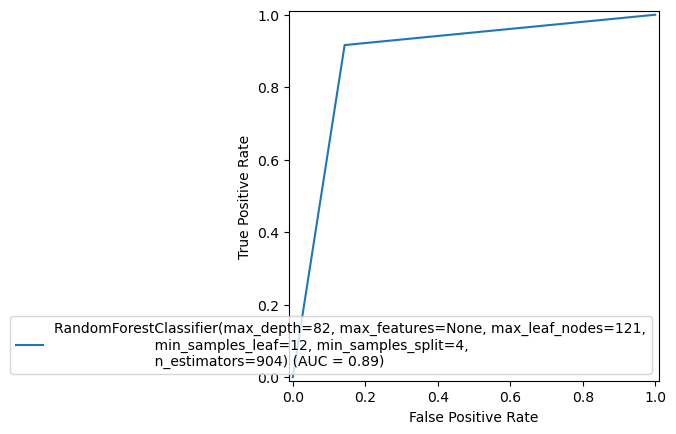

In [211]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()
plt.show()

Above is the ROC curve for the final model and AUC value for the final model is 89%

In [212]:
#Save the model
import pickle
filename='Insurance_Claim_Fraud_Detection.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [213]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Insurance_Claim_Fraud_Detection.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Loaded model's score: ",result*100)

Loaded model's score:  88.73873873873875


In [214]:
#Prediction using the loaded model
df1=pd.DataFrame()
df1['Original']=y_test
df1['Predicted']=loaded_model.predict(x_test)
df1.reset_index(drop=True,inplace=True)
df1

Original  Predicted
0         1.0        0.0
1         0.0        0.0
2         1.0        1.0
3         0.0        0.0
4         1.0        1.0
..        ...        ...
439       1.0        1.0
440       0.0        0.0
441       1.0        1.0
442       1.0        1.0
443       0.0        0.0

[444 rows x 2 columns]